### Phase portrait (Fig. 2A)

In [151]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [1]:
#Eqs (1) and (2) of the main text.
function baseline!(du, u, p, t)
    du[1] = (1 - u[1] - u[2]) * (1 + p[2] * u[1]) - u[1] * p[1] * (1 + u[2] * p[2])
    du[2] = (1 - u[1] - u[2]) * (1 + p[2] * u[2]) - u[2] * p[1] * (1 + u[1] * p[2])
end

baseline! (generic function with 1 method)

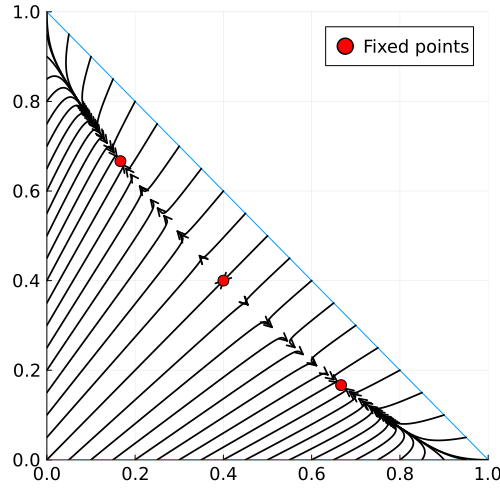

In [3]:
#Plotting the phase portrait
tspan=(0.0,2.0)
#Case N=40. 
ss1x=zeros(2)
ss1y=zeros(2)
basins=zeros(21,21)
p=[0.5,3.0]
pl=plot([0,1,0],[0,0,1], label=false, xlims=[0,1],  ylims=[0,1], dpi=1000, ytickfontsize=12, xtickfontsize=12, legendfontsize=12)
ssx=[1/(2+p[1]),0.5*((1-p[1]/p[2])+sqrt((p[2]-p[1])^2-4)/p[2]),0.5*((1-p[1]/p[2])-sqrt((p[2]-p[1])^2-4)/p[2])]
ssy=[1/(2+p[1]),0.5*((1-p[1]/p[2])-sqrt((p[2]-p[1])^2-4)/p[2]),0.5*((1-p[1]/p[2])+sqrt((p[2]-p[1])^2-4)/p[2])]
for i in 1:21
    for j in 1:21
        if j==1 || i==1 || j+i==22 #((i-1)*0.05+(j-1)*0.05)<=1.0
            u0=[(i-1)*0.05,(j-1)*0.05]
            prob=ODEProblem(baseline!,u0,tspan,p)
            sol=solve(prob)
            plot!(sol, linewidth=1.75, label=false, idxs=(1,2), color="black", arrow=true)
        end
    end
end
    u0=[0.52,0.01]
    prob=ODEProblem(baseline!,u0,tspan,p)
    sol=solve(prob)
ss1x[1]=sol.u[end][1]
ss1y[1]=sol.u[end][2]
    u0=[0.01,0.52]
    prob=ODEProblem(baseline!,u0,tspan,p)
    sol=solve(prob)
ss1x[2]=sol.u[end][1]
ss1y[2]=sol.u[end][2]
scatter!(ssx,ssy, label="Fixed points", xlims=[0,1], markersize=6, color="red",  ylims=[0,1],size=(500,500))
#savefig(pl, "phase_port.png") 

## Integrals (Figs 2B and C)

In [5]:
#Loading files. Integration performed with Mathematica, see associate file
using DelimitedFiles
numint=readdlm("numint_rate.csv", ',');
anal=readdlm("analytic_rate.csv", ',');
binomialr=readdlm("binomial_rate.csv", ',');

In [6]:
binomialr

11×2 Matrix{Float64}:
 0.25  0.415906
 0.3   0.212178
 0.35  0.0924667
 0.4   0.0493686
 0.45  0.0250512
 0.5   0.00833692
 0.55  0.00254882
 0.6   0.00111072
 0.65  0.000470337
 0.7   0.000123544
 0.75  3.08482e-5

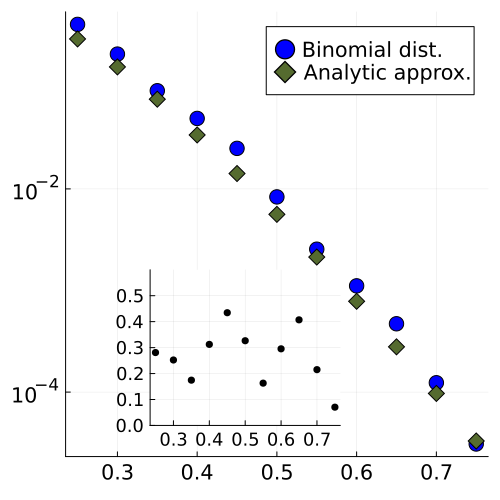

In [7]:
pl=scatter(binomialr[:,1],binomialr[:,2], label="Binomial dist.", yaxis=:log,size=(500,500), ms=8, xtickfontsize=14,ytickfontsize=14, xguidefontsize=18, markercolor="blue", yguidefontsize=18, legendfontsize=14, dpi=1000)
scatter!(anal[:,1],anal[:,2],label="Analytic approx.", ms=8, markercolor="darkolivegreen", markershape=:diamond)
scatter!(anal[:,1],abs.(binomialr[:,2]-anal[:,2])./binomialr[:,2],  inset = (1, bbox(0.2, 0.07, 0.45, 0.35, :bottom, :left)), xtickfontsize=12,ytickfontsize=12, ylims=[0.00,0.6], subplot = 2, label=false,  ms=4, markercolor="black", markershape=:circle)

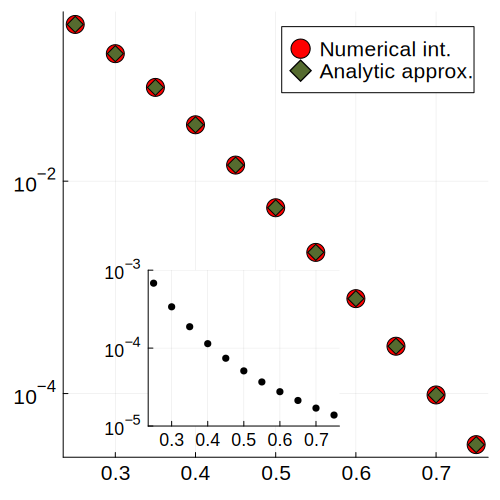

In [8]:
default(fontfamily="Helvetica")
pl=scatter(numint[:,1],numint[:,2], label="Numerical int.", yaxis=:log,size=(500,500), ms=10, xtickfontsize=14,ytickfontsize=14, xguidefontsize=18, markercolor="red", yguidefontsize=18, legendfontsize=14, dpi=1000)
scatter!(anal[:,1],anal[:,2],label="Analytic approx.", ms=8, markercolor="darkolivegreen", markershape=:diamond)
scatter!(numint[:,1],(anal[:,2]-numint[:,2])./numint[:,2],  inset = (1, bbox(0.2, 0.07, 0.45, 0.35, :bottom, :left)),  xtickfontsize=12,ytickfontsize=12, ylims=[0.00001,0.001], subplot = 2, yaxis=:log, label=false,  ms=4, markercolor="black", markershape=:circle)

# HMR locus application: Figs 3 and C.1

In [19]:
#Model from Miangolarra et al, 2024
sir_conc=[0.1, 0.125,0.15,0.2,0.225,0.25,0.275,0.3,0.325,0.35]
sil_loss_model=[0.14885496183205726,5.8443142996583673E-002,2.6598086698955289E-002,1.3846339196585317E-002,1.1406897323927891E-002,6.2798065323517146E-003,4.3743414540694144E-003,2.7225757216372578E-003,2.2979349224829951E-003,1.7947132007746672E-003,1.2007709151085236E-003] 
#Experimental data from Saxton & Rine, 2022
sir_conc_exp=[99.8710778095998/1060+0.025, 124.7960346203073/1060+0.025, 175.1413337312679/1060+0.025, 250.06220119036007/1060+0.025]
sil_loss_exp=[0.15845125492874484/2, 0.1008287035177032/2, 0.031003024685335112/2, 0.01887809714577604/2]

4-element Vector{Float64}:
 0.07922562746437242
 0.0504143517588516
 0.015501512342667556
 0.00943904857288802

In [167]:
sir_conc_exp

4-element Vector{Float64}:
 0.1192179979335847
 0.14273210813236537
 0.19022767333138482
 0.2609077369720378

In [150]:
using IntervalArithmetic, IntervalRootFinding
using Optim
using SpecialFunctions

In [137]:
function SIRODE!(x,p)
    ksir=p[1]
    ksas=p[2]
    Vm=p[3]
    kd=p[4]
    ksil=p[5]
    csir=p[6]
    s=csir*kd*x^2*(x-x*Vm-1)/(csir*kd*x^2*(Vm-1)-2*Vm)
    V=Vm/(1+(Vm-1)*(x+s)) 
    ODEf=-ksas*x+ksir*(1-x-s)*s/V+ksil*(1-x-s)
    return ODEf
end    

SIRODE! (generic function with 1 method)

In [287]:
function optimODE!(p)
    model_rates=zeros(length(sir_conc_exp))
    for i = 1:length(sir_conc_exp)
        ksir=p[1]
        ksas=p[2]
        Vm=1.5^3
        kd=12.0
        ksil=0.02
        csir=sir_conc_exp[i]
        p2=[ksir,ksas,Vm,kd,ksil,csir]
        #if i<4
        limit=0.7
        #else
        #    limit=0.475
        #end
        rootsODE=roots(x -> SIRODE!(x,p2), 0..limit)
        midpoints = mid.(interval.(rootsODE))
        sort_midpoint=sort(midpoints)
        sort_unmod=zeros(3)
        for i2 in 1:3 
            sort_unmod[i2]=sort_midpoint[i2]+csir*kd*sort_midpoint[i2]^2*(sort_midpoint[i2]-sort_midpoint[i2]*Vm-1)/(csir*kd*sort_midpoint[i2]^2*(Vm-1)-2*Vm)
        end
        model_rates[i]=0.5*(1+erf((sort_unmod[2]-sort_unmod[3]/2)*sqrt(24/sort_unmod[3])))
    end
    R2s=0.0
    for i = 1:length(sir_conc_exp)
        R2s=R2s+(model_rates[i]-sil_loss_exp[i])^2
    end
    return R2s
end

optimODE! (generic function with 1 method)

In [288]:
#It can be checked that this parameter set minimises the cost function defined in optimODE!
#(parameter optimisation with local minimisation, within 2% of the optimal parameter value).
R2s=optimODE!([24.5,0.8])
R2s

3.929164403196554e-5

In [302]:
function model_rates!(p)
    model_rates=zeros(35)
    concs=zeros(35)
    for i = 1:length(model_rates)
        ksir=p[1]
        ksas=p[2]
        Vm=1.5^3
        kd=12.0
        ksil=0.02
        csir=0.04+0.01*i
        p2=[ksir,ksas,Vm,kd,ksil,csir]
        if i<20
            limit=0.75
        else
            limit=0.6
        end
        rootsODE=roots(x -> SIRODE!(x,p2), 0..limit)
        midpoints = mid.(interval.(rootsODE))
        sort_midpoint=sort(midpoints)
        sort_unmod=zeros(3)
        for i2 in 1:3 
            sort_unmod[i2]=sort_midpoint[i2]+csir*kd*sort_midpoint[i2]^2*(sort_midpoint[i2]-sort_midpoint[i2]*Vm-1)/(csir*kd*sort_midpoint[i2]^2*(Vm-1)-2*Vm)
        end
        model_rates[i]=0.5*(1+erf((sort_unmod[2]-sort_unmod[3]/2)*sqrt(24/sort_unmod[3])))
        concs[i]=csir
    end
    return concs, model_rates
end

model_rates! (generic function with 1 method)

In [303]:
concs, model_rates=model_rates!([24.5,0.8])

([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11000000000000001, 0.12, 0.13, 0.14  …  0.3, 0.31, 0.32, 0.32999999999999996, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39], [0.923328228737669, 0.6424251899221775, 0.4240571240767472, 0.28470019088998166, 0.19742606674680113, 0.1415855144779486, 0.10473110083012199, 0.07962398880391275, 0.062005853138113465, 0.04930746062618779  …  0.005699861944039097, 0.005239833235833713, 0.00483255550731837, 0.004470252299222488, 0.004146497562944829, 0.003855946870521487, 0.00359412608706422, 0.003357268712267325, 0.00314218323871146, 0.0029461511906200277])

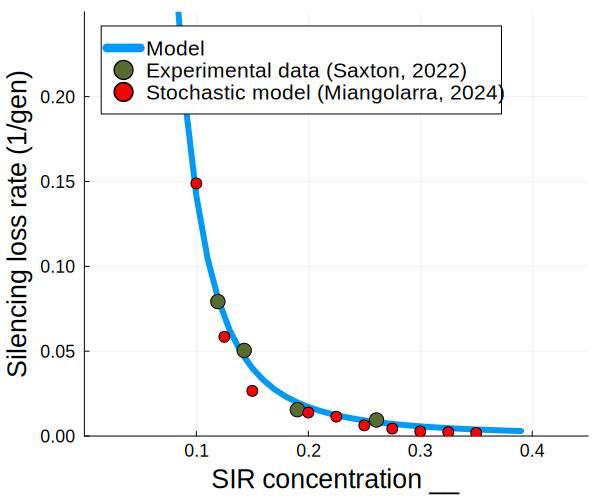

In [304]:
default(fontfamily="Helvetica")
p=plot(concs,model_rates,label="Model",  ylims=(0.0, 0.25), xlims=(0.0,0.45), linewidth=6, xticks = 0.1:0.1:0.4, ylabel="Silencing loss rate (1/gen)", xlabel="SIR concentration   __", legend=:topleft, size=(600,500), dpi=1000)
scatter!(sir_conc_exp,sil_loss_exp, label="Experimental data (Saxton, 2022)", ms=8, xtickfontsize=12,ytickfontsize=12,xguidefontsize=18, yguidefontsize=18, legendfontsize=14, markercolor="darkolivegreen")
scatter!(sir_conc,sil_loss_model, label="Stochastic model (Miangolarra, 2024)", ms=6, xtickfontsize=12,ytickfontsize=12,xguidefontsize=18, yguidefontsize=18, legendfontsize=14, markercolor="red")

In [399]:
function model_ss!(p)
    model_ss=zeros(35, 3)
    concs=zeros(35)
    for i = 1:length(model_rates)
        ksir=p[1]
        ksas=p[2]
        Vm=1.5^3
        kd=12.0
        ksil=0.02
        csir=0.04+0.01*i
        p2=[ksir,ksas,Vm,kd,ksil,csir]
        if i<20
            limit=0.75
        else
            limit=0.6
        end
        rootsODE=roots(x -> SIRODE!(x,p2), 0..limit)
        midpoints = mid.(interval.(rootsODE))
        sort_midpoint=sort(midpoints)
        sort_unmod=zeros(3)
        for i2 in 1:3 
            sort_unmod[i2]=sort_midpoint[i2]+csir*kd*sort_midpoint[i2]^2*(sort_midpoint[i2]-sort_midpoint[i2]*Vm-1)/(csir*kd*sort_midpoint[i2]^2*(Vm-1)-2*Vm)
            model_ss[i,i2]=sort_unmod[i2]
        end
        concs[i]=csir
    end
    return concs, model_ss
end

model_ss! (generic function with 1 method)

In [400]:
concs, model_ss=model_ss!([24.5,0.8])

([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11000000000000001, 0.12, 0.13, 0.14  …  0.3, 0.31, 0.32, 0.32999999999999996, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39], [0.024982153829491722 0.5615456175652467 0.763045148238551; 0.025107277422939066 0.46260309760598184 0.829268577389505; … ; 0.031342717281945945 0.09604150944586104 0.9683041043343521; 0.031672967773380495 0.09320764545885978 0.9688758610574565])

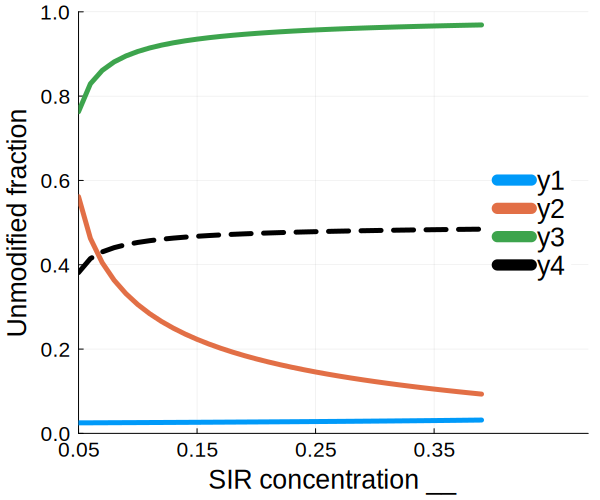

In [402]:
default(fontfamily="Helvetica")
p=plot(concs,model_ss,  ylims=(0.0, 1.0), xlims=(0.05,0.48), linewidth=5, xticks = 0.05:0.1:0.4, ylabel="Unmodified fraction", xlabel="SIR concentration   __", legend=:right, size=(600,500), dpi=1000)
plot!(concs,model_ss[:,3]/2.0, linestyle=:dash, linewidth=5, linecolor=:black, legendfontsize=18, xtickfontsize=14, ytickfontsize=14, yguidefontsize=18, xguidefontsize=18, fg_legend = :transparent)

In [443]:
xx=(1:1000)*0.00065
ksir=18
ksas=1.0
Vm=1.5^3
kd=12.0
ksil=0.02
csir=0.12
p2=[ksir,ksas,Vm,kd,ksil,csir]
yy=zeros(length(xx))
for i=1:length(xx)
    yy[i]=csir*kd*xx[i]^2*(xx[i]-xx[i]*Vm-1)/(csir*kd*xx[i]^2*(Vm-1)-2*Vm)
end
csir=0.18
yy2=zeros(length(xx))
for i=1:length(xx)
    yy2[i]=csir*kd*xx[i]^2*(xx[i]-xx[i]*Vm-1)/(csir*kd*xx[i]^2*(Vm-1)-2*Vm)
end
csir=0.24
yy3=zeros(length(xx))
for i=1:length(xx)
    yy3[i]=csir*kd*xx[i]^2*(xx[i]-xx[i]*Vm-1)/(csir*kd*xx[i]^2*(Vm-1)-2*Vm)
end
default(fontfamily="Helvetica")
plot(xx,yy, linewidth=5, xticks = 0.1:0.1:0.6, ylabel="Sir-bound fraction", xlabel="Unmodified fraction", size=(600,500), dpi=1000, xtickfontsize=14, ytickfontsize=14, yguidefontsize=18, xguidefontsize=18, fmt = :svg)
plot!(xx,yy2,linewidth=5,legendfontsize=18, fg_legend = :transparent)
plot!(xx,yy3,linewidth=5)
savefig("s_u.svg")

"C:\\Users\\movilla\\Documents\\Minimal Epigenetics project\\Code\\s_u.svg"